In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("top 240 restaurants recommanded in los angeles 2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             2381 non-null   int64  
 1   CommentDate      2381 non-null   object 
 2   Date             2381 non-null   object 
 3   RestaurantName   2381 non-null   object 
 4   Comment          2381 non-null   object 
 5   Address          2371 non-null   object 
 6   StarRating       2381 non-null   float64
 7   NumberOfReviews  2381 non-null   int64  
 8   Style            2381 non-null   object 
 9   Price            1745 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 186.1+ KB


In [33]:
df.describe()

,Rank,StarRating,NumberOfReviews
count,2381.000000,2381.000000,2381.000000
mean,120.173457,4.304662,1141.541369
std,68.925564,0.312753,1531.834833
min,1.000000,3.500000,2.000000
25%,61.000000,4.100000,129.000000
50%,119.000000,4.300000,518.000000
75%,180.000000,4.500000,1623.000000
max,240.000000,5.000000,10020.000000


In [34]:
df.head()

,Rank,CommentDate,Date,RestaurantName,Comment,Address,StarRating,NumberOfReviews,Style,Price
0,1,2023-09-16,2023-09-17,GRANVILLE,Great ambiance indoors and attentive staff. Re...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
1,1,2023-09-15,2023-09-17,GRANVILLE,Wrong wrong wrong. AIf you don't fit the Ty ...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
2,1,2023-09-07,2023-09-17,GRANVILLE,Bad service!! The worst servers. Marcos the ma...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
3,1,2023-09-06,2023-09-17,GRANVILLE,One of my absolute favorite places in WeHo for...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$
4,1,2023-09-05,2023-09-17,GRANVILLE,Always a good experience and food is great.Tea...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars",$$


In [35]:
df.drop(columns=['Price'], inplace=True)
df.head()

,Rank,CommentDate,Date,RestaurantName,Comment,Address,StarRating,NumberOfReviews,Style
0,1,2023-09-16,2023-09-17,GRANVILLE,Great ambiance indoors and attentive staff. Re...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars"
1,1,2023-09-15,2023-09-17,GRANVILLE,Wrong wrong wrong. AIf you don't fit the Ty ...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars"
2,1,2023-09-07,2023-09-17,GRANVILLE,Bad service!! The worst servers. Marcos the ma...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars"
3,1,2023-09-06,2023-09-17,GRANVILLE,One of my absolute favorite places in WeHo for...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars"
4,1,2023-09-05,2023-09-17,GRANVILLE,Always a good experience and food is great.Tea...,"8701 Beverly Blvd West Hollywood, CA 90048",4.4,2672,"American (New), Cocktail Bars"


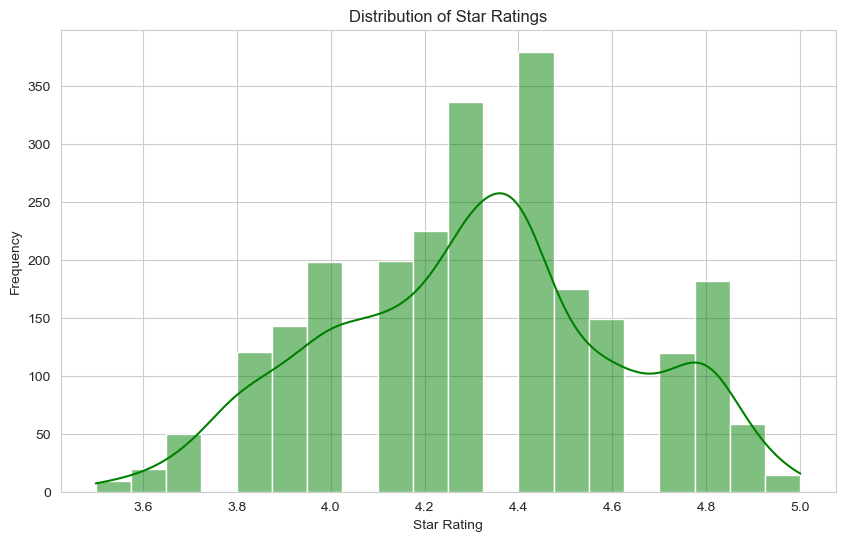

In [36]:
# Descriptive statistics
# Plotting distribution of StarRating
plt.figure(figsize=(10, 6))
sns.histplot(df['StarRating'], kde=True, bins=20,color="g")
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Axes: >

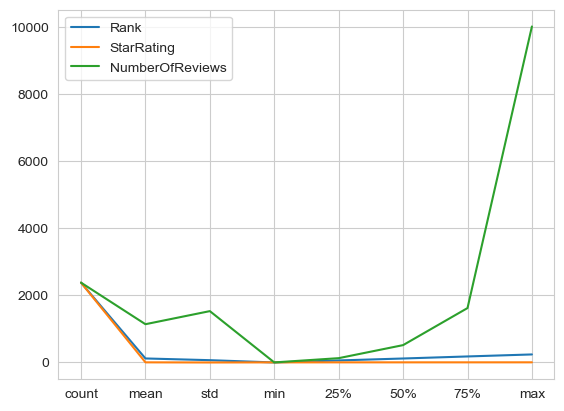

In [37]:
desc_stats = df.describe()
desc_stats.plot()

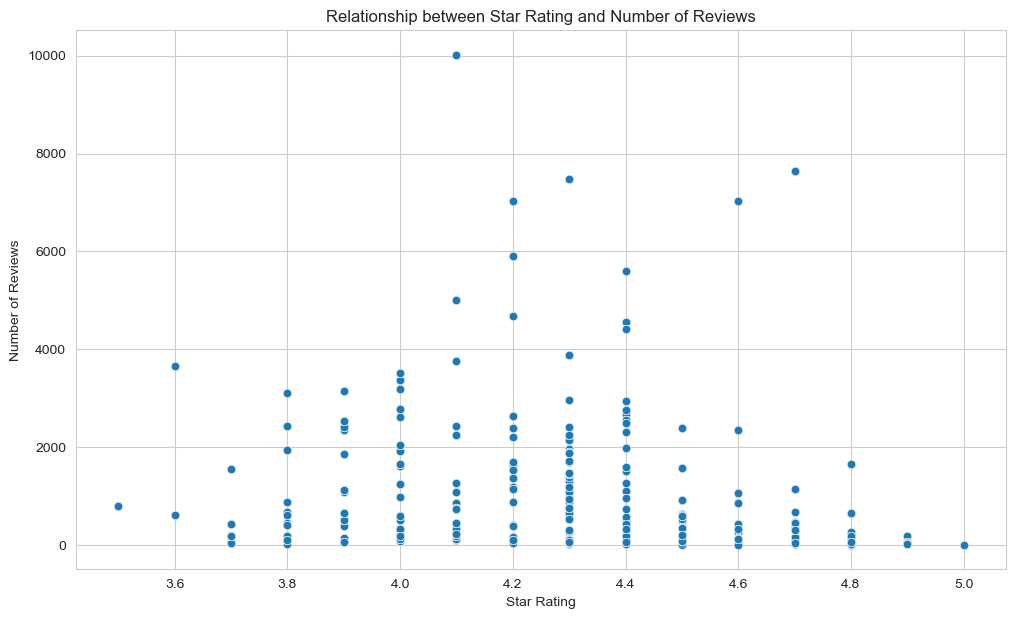

In [38]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='StarRating', y='NumberOfReviews', alpha=0.6)
plt.title('Relationship between Star Rating and Number of Reviews')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

In [39]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


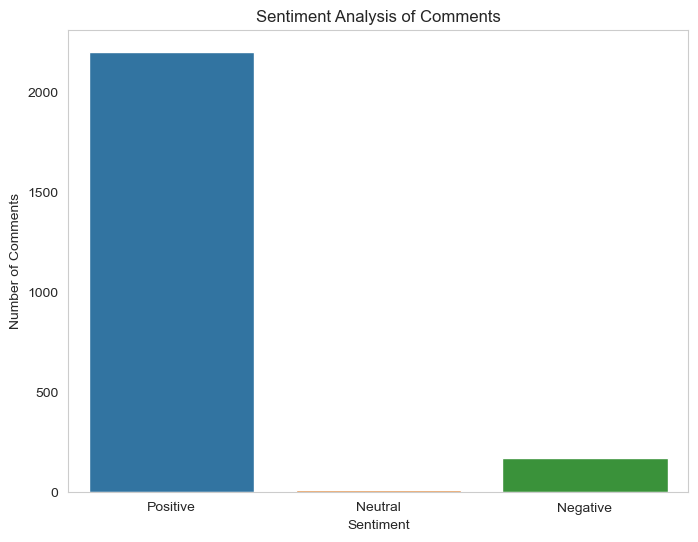

In [40]:
from textblob import TextBlob
# Function to get the polarity of the comment
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
# Applying the function to the 'Comment' column
df['Sentiment_Polarity'] = df['Comment'].apply(get_polarity)
# Categorizing the sentiment based on polarity
df['Sentiment'] = df['Sentiment_Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative'))
# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Analysis of Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.grid(axis='y')
plt.show()

In [41]:
from textblob import TextBlob

# Function to get the sentiment score
def get_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Function to classify sentiment based on score
def get_sentiment_status(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Calculate sentiment score and status
df['SentimentScore'] = df['Comment'].apply(get_sentiment_score)
df['SentimentStatus'] = df['SentimentScore'].apply(get_sentiment_status)

df[['Comment', 'SentimentScore', 'SentimentStatus']].head()

,Comment,SentimentScore,SentimentStatus
0,Great ambiance indoors and attentive staff. Re...,0.312245,Positive
1,Wrong wrong wrong. AIf you don't fit the Ty ...,-0.275000,Negative
2,Bad service!! The worst servers. Marcos the ma...,-0.652344,Negative
3,One of my absolute favorite places in WeHo for...,0.566667,Positive
4,Always a good experience and food is great.Tea...,0.509333,Positive


In [42]:
# Group by restaurant name and calculate the average sentiment score
restaurant_sentiment = df.groupby('RestaurantName')['SentimentScore'].mean().reset_index()

# Sort the restaurants by sentiment score in descending order
top_ranked_restaurants = restaurant_sentiment.sort_values(by='SentimentScore', ascending=False).head(10)
print(top_ranked_restaurants)

                                   RestaurantName  SentimentScore
110                                     La Bohème        0.582520
60                     Gangnam Station Korean BBQ        0.567194
140                      Morrison Atwater Village        0.542213
100                                     Khawaiian        0.483123
159                                         Perch        0.479561
203  The Butcher, The Baker, The Cappuccino Maker        0.479017
32           Carlitos Gardel Argentine Steakhouse        0.472329
214                  Three Borders Brunch & Grill        0.463653
26                           Bottega Louie - WEHO        0.461671
126                           Maccheroni Republic        0.448648


In [43]:
# Group by restaurant name and calculate the average for StarRating, SentimentScore, and sum of NumberOfReviews
restaurant_ranking = df.groupby('RestaurantName').agg({
    'StarRating': 'mean',
    'SentimentScore': 'mean',
    'NumberOfReviews': 'sum'
}).reset_index()

# Calculate a composite score based on StarRating, SentimentScore, and NumberOfReviews
restaurant_ranking['CompositeScore'] = (restaurant_ranking['StarRating'] + restaurant_ranking['SentimentScore']) * restaurant_ranking['NumberOfReviews']

# Sort the restaurants by composite score in descending order
top_ranked_composite = restaurant_ranking.sort_values(by='CompositeScore', ascending=False).head(10)
top_ranked_composite[['RestaurantName', 'StarRating', 'SentimentScore', 'NumberOfReviews', 'CompositeScore']]

,RestaurantName,StarRating,SentimentScore,NumberOfReviews,CompositeScore
140,Morrison Atwater Village,4.6,0.542213,91455,470281.045726
159,Perch,4.1,0.479561,100200,458872.017883
84,Howlin' Ray's,4.7,0.172251,76420,372337.442004
169,Republique,4.2,0.304275,77418,348711.990819
22,Bestia,4.3,0.296003,74860,344056.820245
188,Slurpin' Ramen Bar - Los Angeles,4.4,0.419521,56040,270085.960682
23,Blu Jam Café,4.2,0.313873,59160,267040.746387
114,Langer's Delicatessen,4.4,0.313044,48664,229355.566461
132,Marugame Monzo,4.4,0.156183,50237,228888.943410
9,BCD Tofu House,4.1,0.277748,50040,219062.501110


In [44]:
# Add a 'Rank' column based on the descending order of the CompositeScore
top_ranked_composite['Rank'] = top_ranked_composite['CompositeScore'].rank(method='min', ascending=False).astype(int)

# Sort the dataframe by the new 'Rank' column
top_ranked_composite = top_ranked_composite.sort_values(by='Rank')

top_ranked_composite[['Rank', 'RestaurantName', 'StarRating', 'SentimentScore', 'NumberOfReviews', 'CompositeScore']].head(5)

,Rank,RestaurantName,StarRating,SentimentScore,NumberOfReviews,CompositeScore
140,1,Morrison Atwater Village,4.6,0.542213,91455,470281.045726
159,2,Perch,4.1,0.479561,100200,458872.017883
84,3,Howlin' Ray's,4.7,0.172251,76420,372337.442004
169,4,Republique,4.2,0.304275,77418,348711.990819
22,5,Bestia,4.3,0.296003,74860,344056.820245


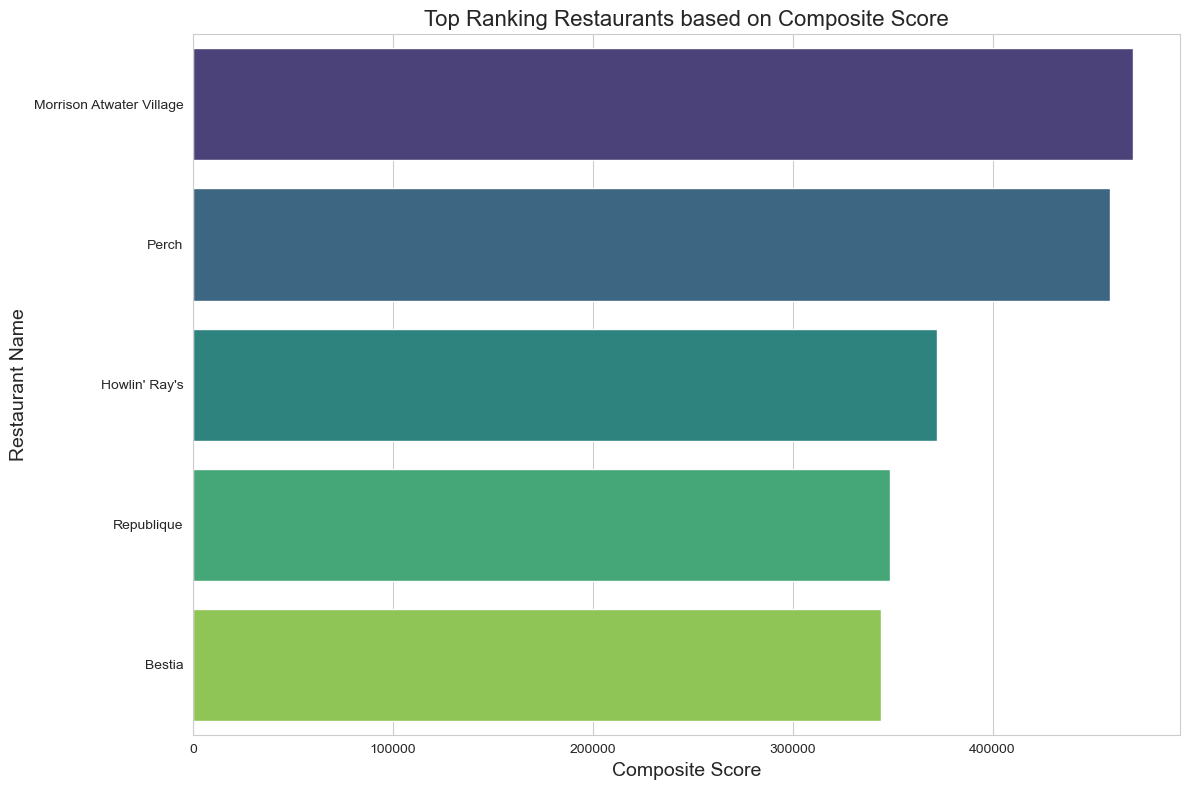

In [45]:
# Setting the style and size for the plot
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

# Plot the top-ranked restaurants based on CompositeScore
sns.barplot(x='CompositeScore', y='RestaurantName', data=top_ranked_composite.head(5), palette='viridis')

# Set the title and labels for the plot
plt.title('Top Ranking Restaurants based on Composite Score', fontsize=16)
plt.xlabel('Composite Score', fontsize=14)
plt.ylabel('Restaurant Name', fontsize=14)
plt.tight_layout()
plt.show()

In [46]:
# Sort the restaurants by composite score in descending order
sorted_restaurant_ranking = restaurant_ranking.sort_values(by='CompositeScore', ascending=False)

# Save the sorted list to a CSV file
sorted_restaurant_ranking.to_csv('top-5-sorted_restaurant_ranking.csv', index=False)